In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns 

In [4]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
from ucimlrepo import fetch_ucirepo, list_available_datasets
#list_available_datasets()

In [5]:
data = fetch_ucirepo(name='Adult')
df = pd.DataFrame(data= data.data.original)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [7]:
df.isna().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [8]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [9]:
df = df[~df['occupation'].isnull() ]
df = df[ ~df['workclass'].isnull()]
df = df[~df['native-country'].isnull()]


In [10]:
df.loc[df['income'] == '<=50K.', 'income'] = '<=50K'
df.loc[df['income'] == '>50K.', 'income'] = '>50K'

In [11]:
df.select_dtypes(include='object').columns.to_list()
#df.select_dtypes(include=['int', 'datetime', 'object'])

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'income']

In [12]:
df['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'State-gov'),
  Text(1, 0, 'Self-emp-not-inc'),
  Text(2, 0, 'Private'),
  Text(3, 0, 'Federal-gov'),
  Text(4, 0, 'Local-gov'),
  Text(5, 0, '?'),
  Text(6, 0, 'Self-emp-inc'),
  Text(7, 0, 'Without-pay'),
  Text(8, 0, 'Never-worked')])

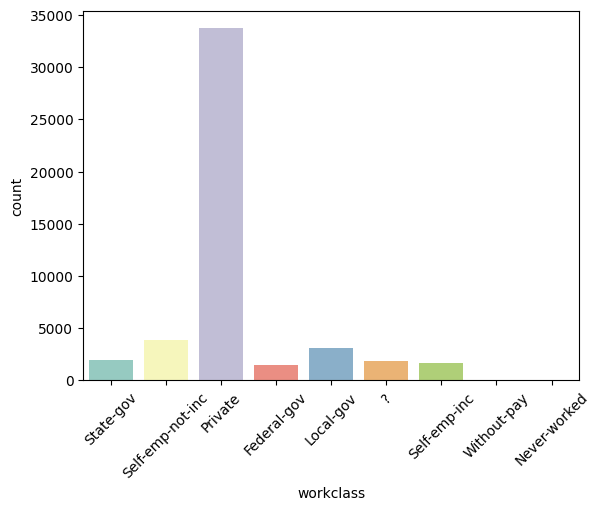

In [13]:
sns.countplot(x = 'workclass', data = df, palette="Set3")
plt.xticks(rotation=45)

In [14]:
labels = []
for i in df.select_dtypes(include='object').columns.to_list():
    labels.append(i)

In [15]:
labels

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'income']

workclass
education
marital-status
occupation
relationship
race
sex
native-country
income


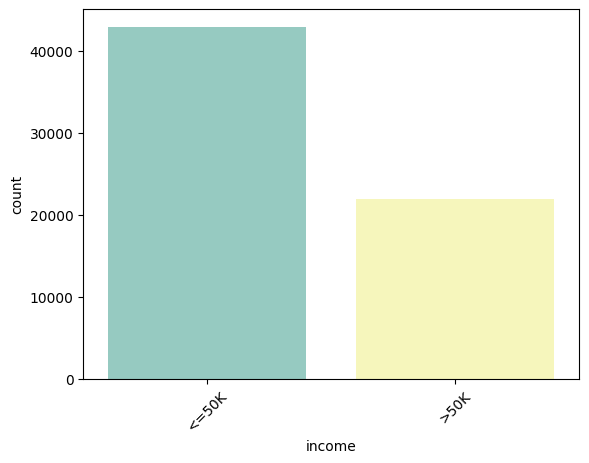

In [16]:
for i in labels:
    print(i)
    sns.countplot(x = i, data = df, palette="Set3")
    plt.xticks(rotation=45)

In [17]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


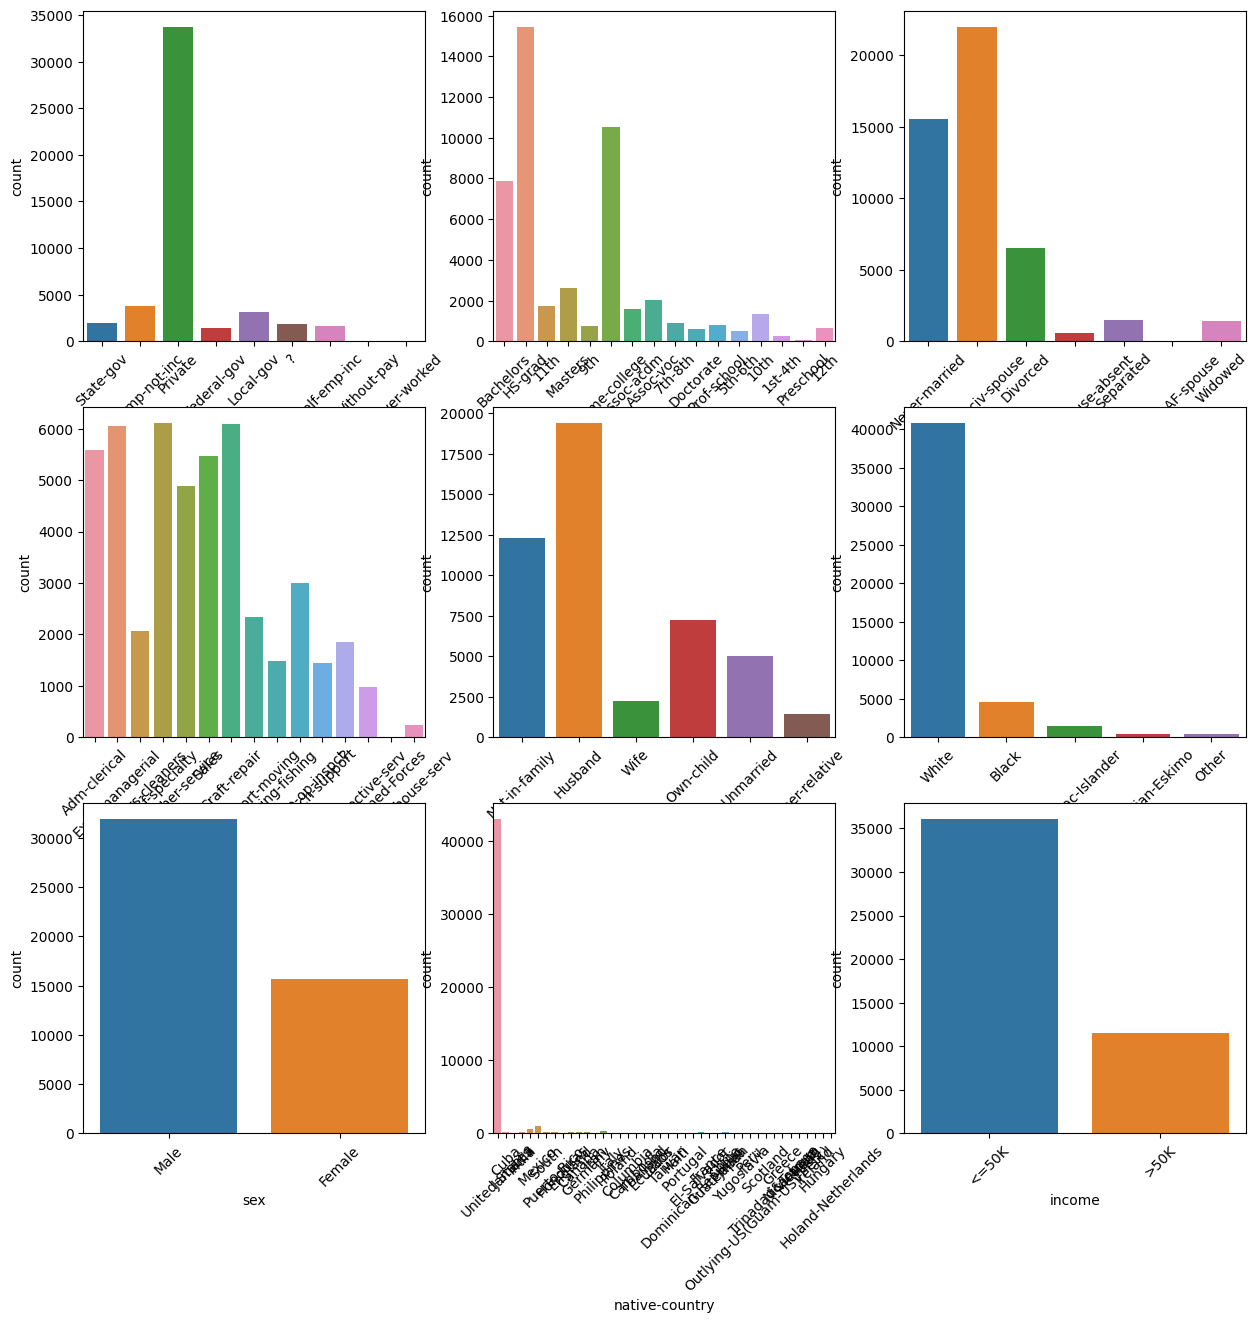

In [18]:
plt.figure(figsize = (15, 30))
for i in enumerate(labels):
    plt.subplot(6, 3,i[0]+1)
    sns.countplot(x= i[1], data = df)
    plt.xticks(rotation = 45)


In [19]:
df.loc[df['income'] == '<=50K', 'income'] = 1
df.loc[df['income'] == '>50K', 'income'] = 0

In [20]:
df['income'] = df['income'].astype(int)

In [22]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income             int32
dtype: object

In [23]:
numerical_features = df.select_dtypes(include=[np.number]).columns

c:\Users\Luan Lima\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


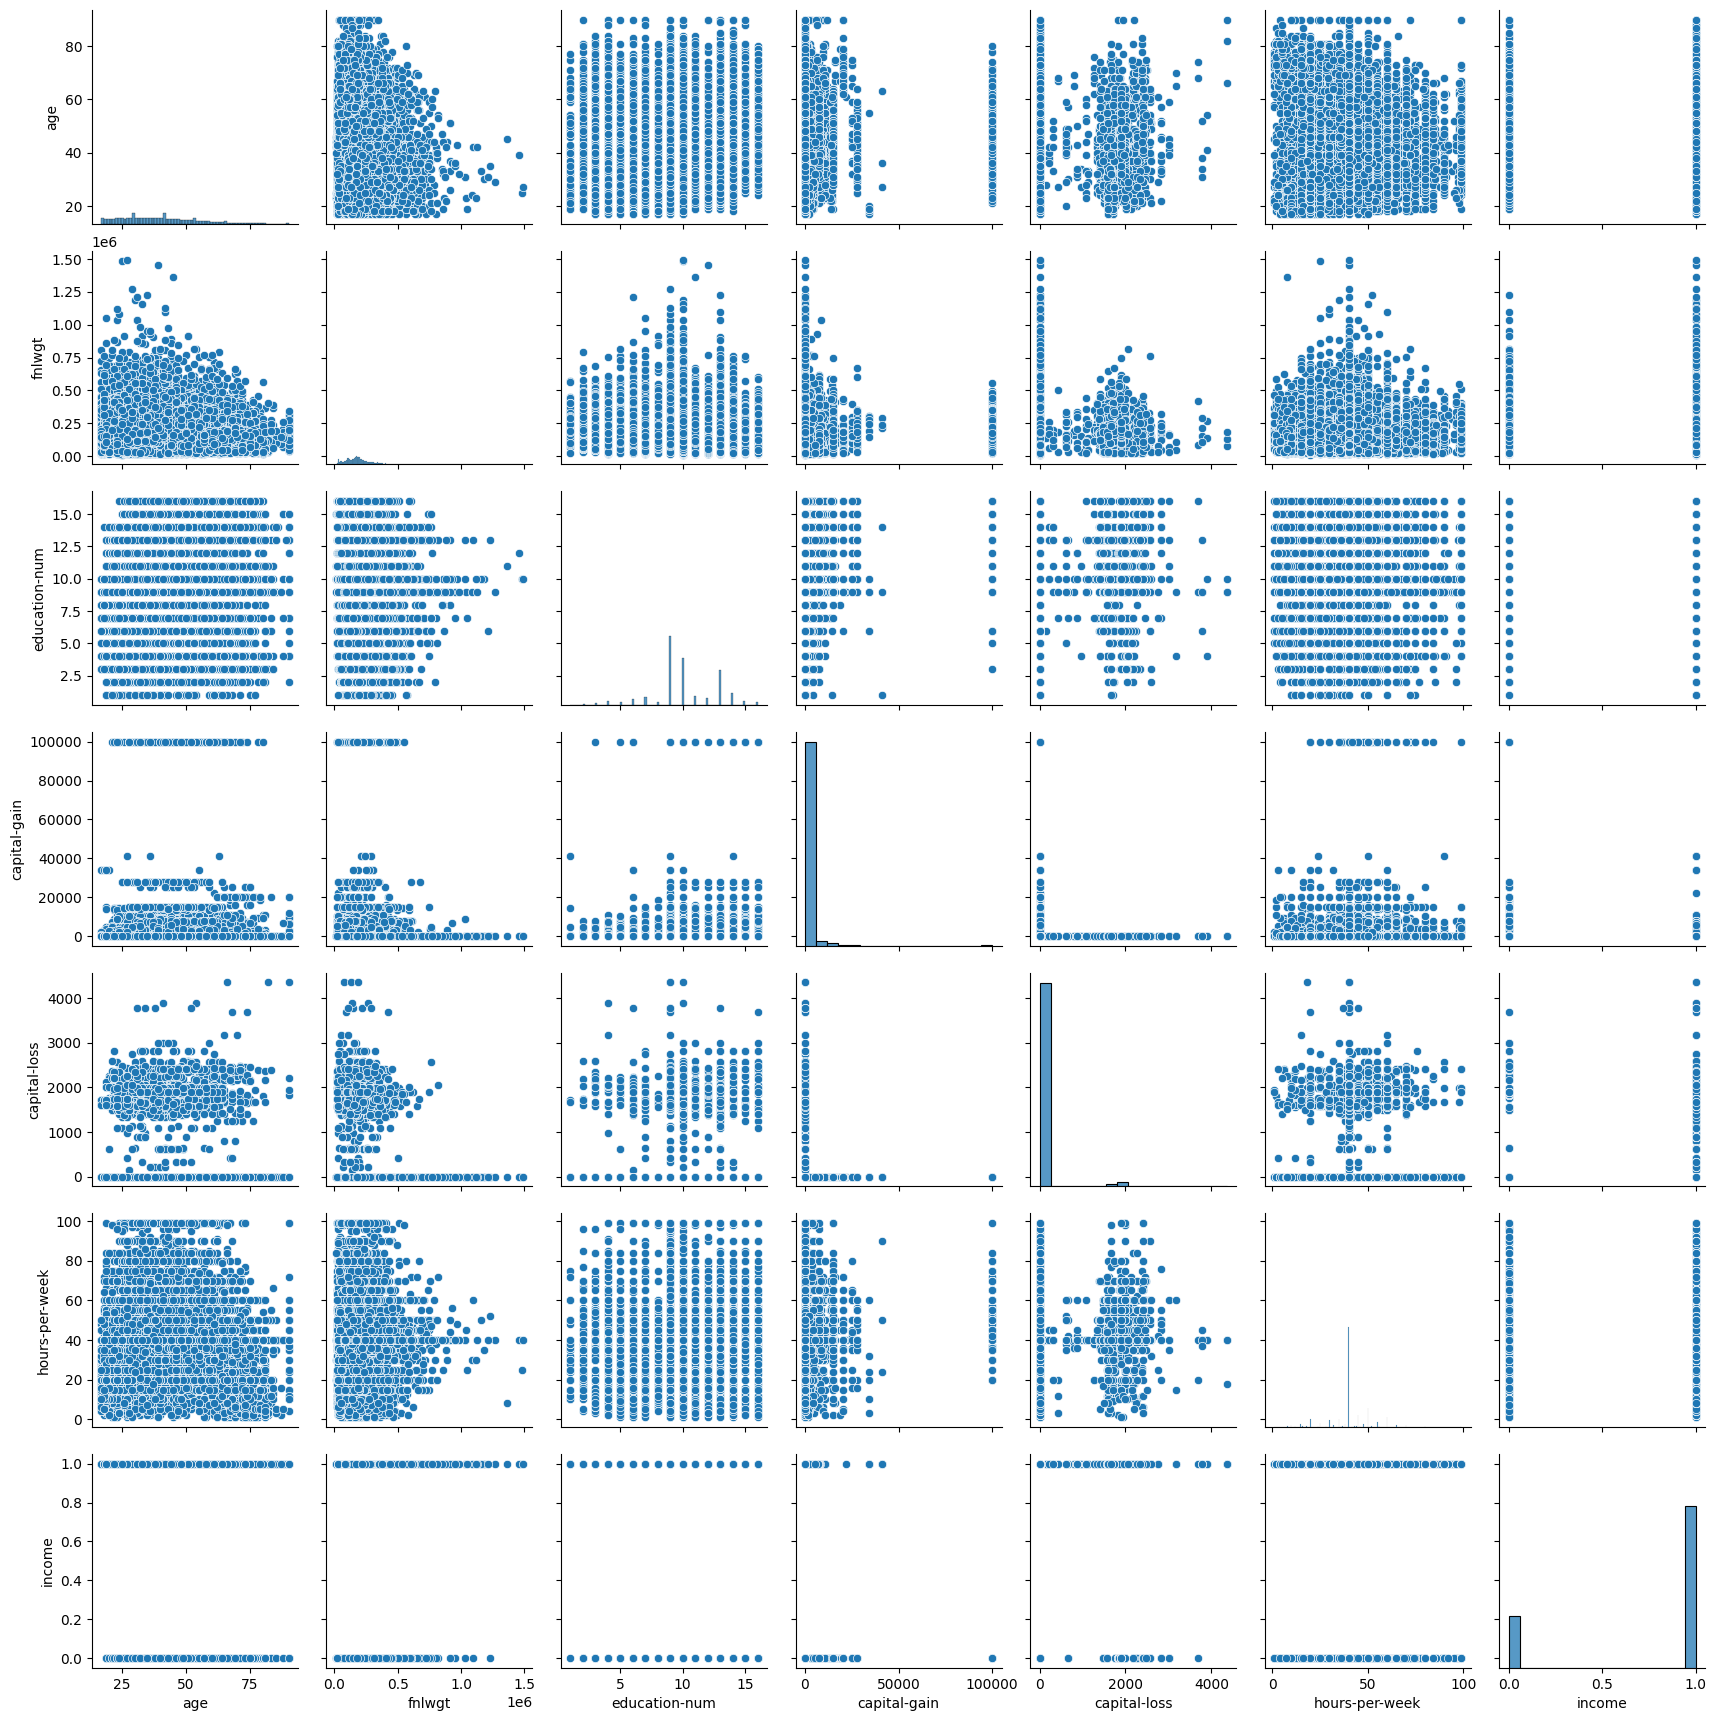

In [326]:
sns.pairplot(df[numerical_features])

In [24]:
import category_encoders as ce

In [25]:
ce_OHE = ce.OneHotEncoder(cols=['sex', 'race', 'relationship', 'education', 'workclass']) 
data = ce_OHE.fit_transform(df)
data.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,workclass_9,...,race_3,race_4,race_5,sex_1,sex_2,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,2174,0,40,United-States,1
1,50,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,13,United-States,1
2,38,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,40,United-States,1
3,53,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,40,United-States,1
4,28,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,40,Cuba,1


In [328]:
numerical_features

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'income'],
      dtype='object')

In [26]:
data.columns

Index(['age', 'workclass_1', 'workclass_2', 'workclass_3', 'workclass_4',
       'workclass_5', 'workclass_6', 'workclass_7', 'workclass_8',
       'workclass_9', 'fnlwgt', 'education_1', 'education_2', 'education_3',
       'education_4', 'education_5', 'education_6', 'education_7',
       'education_8', 'education_9', 'education_10', 'education_11',
       'education_12', 'education_13', 'education_14', 'education_15',
       'education_16', 'education-num', 'marital-status', 'occupation',
       'relationship_1', 'relationship_2', 'relationship_3', 'relationship_4',
       'relationship_5', 'relationship_6', 'race_1', 'race_2', 'race_3',
       'race_4', 'race_5', 'sex_1', 'sex_2', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [27]:
data= data[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'income', 'workclass_1', 'workclass_2', 'workclass_3', 'workclass_4',
       'workclass_5', 'workclass_6', 'workclass_7', 'workclass_8',
       'workclass_9', 'education_1', 'education_2', 'education_3',
       'education_4', 'education_5', 'education_6', 'education_7',
       'education_8', 'education_9', 'education_10', 'education_11',
       'education_12', 'education_13', 'education_14', 'education_15',
       'education_16', 'relationship_1', 'relationship_2', 'relationship_3', 'relationship_4',
       'relationship_5', 'relationship_6', 'race_1', 'race_2', 'race_3',
       'race_4', 'race_5', 'sex_1', 'sex_2', 'capital-gain', 'capital-loss',
       'hours-per-week', 'income']]

In [329]:
data= data[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'income']]

In [28]:
X = data.drop("income", axis=1) 
y = data["income"]

In [39]:
data

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_1,workclass_2,workclass_3,...,race_2,race_3,race_4,race_5,sex_1,sex_2,capital-gain,capital-loss,hours-per-week,income
0,39,77516,13,2174,0,40,1,1,0,0,...,0,0,0,0,1,0,2174,0,40,1
1,50,83311,13,0,0,13,1,0,1,0,...,0,0,0,0,1,0,0,0,13,1
2,38,215646,9,0,0,40,1,0,0,1,...,0,0,0,0,1,0,0,0,40,1
3,53,234721,7,0,0,40,1,0,0,1,...,1,0,0,0,1,0,0,0,40,1
4,28,338409,13,0,0,40,1,0,0,1,...,1,0,0,0,0,1,0,0,40,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,245211,13,0,0,40,1,0,0,1,...,0,0,0,0,1,0,0,0,40,1
48837,39,215419,13,0,0,36,1,0,0,1,...,0,0,0,0,0,1,0,0,36,1
48839,38,374983,13,0,0,50,1,0,0,1,...,0,0,0,0,1,0,0,0,50,1
48840,44,83891,13,5455,0,40,1,0,0,1,...,0,1,0,0,1,0,5455,0,40,1


In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=14) 

In [31]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier( n_estimators=500, 
                                 max_depth=20, max_features=10)



rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=20, max_features=10, n_estimators=500)

In [273]:
'''from sklearn.ensemble import RandomForestRegressor, RandomForestClassifie


rf = RandomForestRegressor(n_jobs=-1,
                           random_state=14)


rf.fit(X_train, y_train)

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)'''

RandomForestRegressor(n_jobs=-1, random_state=14)

In [37]:
len(X_train), len(y_train), len(X_test), len(y_test)

(38096, 38096, 9525, 9525)

In [38]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_log_error

def show_score(model):
  train_preds= model.predict(X_train)
  test_preds = model.predict(X_test)
  scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
            "Test MAE": mean_absolute_error(y_test, test_preds),
            "Training MSE": mean_squared_log_error(y_train, train_preds),
            "Test MSE": mean_squared_log_error(y_test, test_preds),
            "Training RMSE": np.sqrt(mean_squared_log_error(y_train, train_preds)),
            "Test RMSE": np.sqrt(mean_squared_log_error(y_test, test_preds)),
            "Training R2": r2_score(y_train, train_preds),
            "Test R2": r2_score(y_test, test_preds)}
  return scores

In [34]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, max_features=10, n_estimators=500)

In [35]:
show_score(rf)

{'Training MAE': 0.07184481310373793,
 'Test MAE': 0.13973753280839896,
 'Training MSE': 0.034518056990080245,
 'Test MSE': 0.06713731879528881,
 'Training RMSE': 0.18579035763483595,
 'Test RMSE': 0.2591087007325088,
 'Training R2': 0.6083028968982732,
 'Test R2': 0.24222423268611815}

In [36]:
data.columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'income', 'workclass_1', 'workclass_2', 'workclass_3',
       'workclass_4', 'workclass_5', 'workclass_6', 'workclass_7',
       'workclass_8', 'workclass_9', 'education_1', 'education_2',
       'education_3', 'education_4', 'education_5', 'education_6',
       'education_7', 'education_8', 'education_9', 'education_10',
       'education_11', 'education_12', 'education_13', 'education_14',
       'education_15', 'education_16', 'relationship_1', 'relationship_2',
       'relationship_3', 'relationship_4', 'relationship_5', 'relationship_6',
       'race_1', 'race_2', 'race_3', 'race_4', 'race_5', 'sex_1', 'sex_2',
       'capital-gain', 'capital-loss', 'hours-per-week', 'income'],
      dtype='object')